<a href="https://colab.research.google.com/github/samsharm/Python/blob/master/DeepLearningANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model


In [77]:
#generate datasetd

X,y=make_moons(n_samples=100,noise=0.2,random_state=1)

In [78]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [79]:
n_train=70
trainX,testX=X[:n_train,],X[n_train:]
trainy,testy=y[:n_train],y[n_train:]

In [80]:
print(trainX.shape)
print(testX.shape)
print(trainy.shape)
print(testy.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [81]:
model=Sequential()
model.add(Dense(500,input_dim=2, activation='relu', kernel_regularizer='l1'))
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])



In [82]:
es=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False  
)

mc=ModelCheckpoint('best_model.h5',monitor='val_accuracy', mode='max', save_best_only=True)

In [87]:
history=model.fit(trainX,trainy,validation_data=((np.array(testX)),(np.array(testy))),epochs=25,verbose=0,callbacks=[es,mc])

In [88]:
save_model= load_model('best_model.h5')

In [89]:
train_acc=save_model.evaluate(trainX,trainy,verbose=0)
test_acc=save_model.evaluate(testX,testy,verbose=0)

Train Accuracy [1.9945652484893799, 0.8142856955528259]
Test_Accuracy [2.0814504623413086, 0.800000011920929]


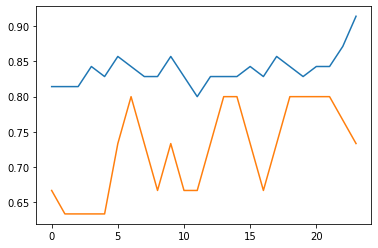

In [90]:
print("Train Accuracy",train_acc)
print("Test_Accuracy",test_acc)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')